In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as mpl

In [3]:
import pickle

In [4]:
df=pd.read_csv("healthcare-dataset-stroke-data.csv")

In [5]:
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [6]:
df.dropna(inplace=True)

In [7]:
df.shape

(4909, 12)

In [8]:
for i in ["id","ever_married","work_type"]:
    df.drop(i,axis=1,inplace=True)

In [9]:
df.drop_duplicates(inplace=True)

In [10]:
df

,gender,age,hypertension,heart_disease,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Urban,228.69,36.6,formerly smoked,1
2,Male,80.0,0,1,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Rural,174.12,24.0,never smoked,1
5,Male,81.0,0,0,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...
5104,Female,13.0,0,0,Rural,103.08,18.6,Unknown,0
5106,Female,81.0,0,0,Urban,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,Rural,82.99,30.6,never smoked,0
5108,Male,51.0,0,0,Rural,166.29,25.6,formerly smoked,0


In [11]:
smoking_status=df["smoking_status"].unique()

In [12]:
for i in df.columns:
    print(df[i].unique())

['Male' 'Female' 'Other']
[6.70e+01 8.00e+01 4.90e+01 7.90e+01 8.10e+01 7.40e+01 6.90e+01 7.80e+01
 6.10e+01 5.40e+01 5.00e+01 6.40e+01 7.50e+01 6.00e+01 7.10e+01 5.20e+01
 8.20e+01 6.50e+01 5.70e+01 4.20e+01 4.80e+01 7.20e+01 5.80e+01 7.60e+01
 3.90e+01 7.70e+01 6.30e+01 7.30e+01 5.60e+01 4.50e+01 7.00e+01 5.90e+01
 6.60e+01 4.30e+01 6.80e+01 4.70e+01 5.30e+01 3.80e+01 5.50e+01 4.60e+01
 3.20e+01 5.10e+01 1.40e+01 3.00e+00 8.00e+00 3.70e+01 4.00e+01 3.50e+01
 2.00e+01 4.40e+01 2.50e+01 2.70e+01 2.30e+01 1.70e+01 1.30e+01 4.00e+00
 1.60e+01 2.20e+01 3.00e+01 2.90e+01 1.10e+01 2.10e+01 1.80e+01 3.30e+01
 2.40e+01 3.60e+01 6.40e-01 3.40e+01 4.10e+01 8.80e-01 5.00e+00 2.60e+01
 3.10e+01 7.00e+00 1.20e+01 6.20e+01 2.00e+00 9.00e+00 1.50e+01 2.80e+01
 1.00e+01 1.80e+00 3.20e-01 1.08e+00 1.90e+01 6.00e+00 1.16e+00 1.00e+00
 1.40e+00 1.72e+00 2.40e-01 1.64e+00 1.56e+00 7.20e-01 1.88e+00 1.24e+00
 8.00e-01 4.00e-01 8.00e-02 1.48e+00 5.60e-01 1.32e+00 1.60e-01 4.80e-01]
[0 1]
[1 0]
['Urban' 'Ru

In [13]:
print(max(df.age),min(df["age"]))

82.0 0.08


In [14]:
print(max(df["bmi"]),min(df.age))

97.6 0.08


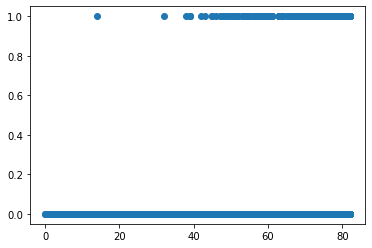

In [15]:
mpl.scatter(df.age,df["stroke"])

<BarContainer object of 4909 artists>

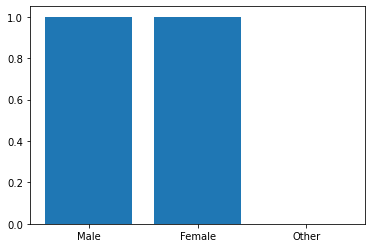

In [16]:
mpl.bar(df["gender"],df["stroke"])

In [17]:
gender=df["gender"].unique()
male_stroke=df["stroke"][df["gender"]=="Male"][df["stroke"]==1].count()
male_no_stroke=df["stroke"][df["gender"]=="Male"][df["stroke"]==0].count()
female_stroke=df["stroke"][df["gender"]=="Female"][df["stroke"]==1].count()
female_no_stroke=df["stroke"][df["gender"]=="Female"][df["stroke"]==0].count()
stroke=[male_stroke,female_stroke]
no_stroke=[female_no_stroke,female_no_stroke]
print(stroke,no_stroke)

[89, 120] [2777, 2777]


## Preprocessing

In [18]:
from sklearn.linear_model import LinearRegression

from sklearn.preprocessing import LabelEncoder

In [19]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [20]:
le=LabelEncoder()
for i in ["gender","Residence_type","smoking_status"]:
    df[i]=le.fit_transform(df[i])

In [21]:
ct=ColumnTransformer([('smoking_status',OneHotEncoder(),[0])],remainder="passthrough")
X=ct.fit_transform(pd.DataFrame(df["smoking_status"]))

In [22]:
df.drop("smoking_status",axis=1,inplace=True)

In [23]:
X=pd.DataFrame(X.todense(),columns=smoking_status)

In [24]:
df=pd.concat([df,X],axis=1)

In [25]:
df.head()

,gender,age,hypertension,heart_disease,Residence_type,avg_glucose_level,bmi,stroke,formerly smoked,never smoked,smokes,Unknown
0,1.0,67.0,0.0,1.0,1.0,228.69,36.6,1.0,0.0,1.0,0.0,0.0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1.0,0.0
2,1.0,80.0,0.0,1.0,0.0,105.92,32.5,1.0,0.0,0.0,0.0,1.0
3,0.0,49.0,0.0,0.0,1.0,171.23,34.4,1.0,0.0,0.0,1.0,0.0
4,0.0,79.0,1.0,0.0,0.0,174.12,24.0,1.0,0.0,1.0,0.0,0.0


In [26]:
df.dropna(inplace=True)

In [27]:
df


,gender,age,hypertension,heart_disease,Residence_type,avg_glucose_level,bmi,stroke,formerly smoked,never smoked,smokes,Unknown
0,1.0,67.0,0.0,1.0,1.0,228.69,36.6,1.0,0.0,1.0,0.0,0.0
2,1.0,80.0,0.0,1.0,0.0,105.92,32.5,1.0,0.0,0.0,0.0,1.0
3,0.0,49.0,0.0,0.0,1.0,171.23,34.4,1.0,0.0,0.0,1.0,0.0
4,0.0,79.0,1.0,0.0,0.0,174.12,24.0,1.0,0.0,1.0,0.0,0.0
5,1.0,81.0,0.0,0.0,1.0,186.21,29.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4904,0.0,5.0,0.0,0.0,0.0,80.93,24.8,0.0,1.0,0.0,0.0,0.0
4905,0.0,60.0,0.0,0.0,0.0,84.54,23.4,0.0,0.0,0.0,1.0,0.0
4906,0.0,53.0,0.0,0.0,1.0,70.51,54.1,0.0,0.0,0.0,1.0,0.0
4907,1.0,55.0,0.0,0.0,0.0,56.87,28.9,0.0,0.0,1.0,0.0,0.0


## Training and Model

In [28]:
from sklearn.model_selection import train_test_split

In [69]:
X=df.drop("stroke",axis=1)
Y=df["stroke"]

In [71]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2)

In [72]:
from sklearn.linear_model import LogisticRegression

In [73]:
lr=LogisticRegression()

In [74]:
from sklearn.svm import SVC
sv=SVC()
sv.fit(x_train,y_train)


SVC()

In [75]:
def get_score(model,X_train,X_test,y_train,y_test):
    model.fit(X_train,y_train)
    return model.score(X_test,y_test)*100


In [76]:
from sklearn.ensemble import RandomForestClassifier


In [84]:
print(get_score(RandomForestClassifier(),x_train,x_test,y_train,y_test))

print(get_score(SVC(),x_train,x_test,y_train,y_test))

print(get_score(LogisticRegression(),x_train,x_test,y_train,y_test))


print(get_score(LinearRegression(),x_train,x_test,y_train,y_test))





95.97457627118644
96.1864406779661
96.29237288135593
6.501194461722093


C:\Users\Balraj\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [87]:
lr=LogisticRegression()
lr.fit(x_train,y_train)
lr.score(x_test,y_test)

C:\Users\Balraj\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9629237288135594

###### The logistic regression algorithm gives a model of 96.292% accuracy.

In [88]:
pickle_out=open("model.pickle","wb")

pickle.dump(lr,pickle_out)
pickle_out.close()

In [89]:
pickle_in=open("model.pickle","rb")
predict=pickle.load(pickle_in)

In [91]:
print(predict.score(x_test,y_test)*100)

96.29237288135593
